# Scientific Computing

## Assignment 3

### Deadline: 7/10 12.00 (Noon)

### Minimizing the potential in a cloud of Argon atoms using the Lennard-Jones potential

Finding a minimum energy configuration for a system of multiple atoms is widely applicable for designing molecular systems in solid state physics, chemistry, medicine and other fields. Most applications will require hundreds of atoms in the model and calculating the energy of the molecule at a quantum level. With hundreds of atoms and quantum level modelling means that finding the energy of a system can take weeks of compute time, thus an iterative method easily take years to run.

Thus, to complete the assignment in a week we will use the much simpler Lennard-Jones Potential. The Lennard-Jones potential works for systems of atoms that do not bind, thus in this work all atoms may move freely and independent of each other. The simple 12-6 Lennard-Jones potential, which is popular because its computationally simple, builds on atoms having a repulsive force and an attractive force. The repulsive force is far stronger but decrease more rapidly with distance, thus there is for a pair of atoms a distance where the total potential is minimal, the potential well.

Lennard-Jones potential can be written in several ways, but the most common is:

$V_{LJ}(r) = {A \over r^{12}}  - {B \over r^6}$

$V_{LJ}(r)$ is the potential at distance $r$ between two atoms

$A = 4\epsilon \sigma^{12}$

$B = 4\epsilon \sigma^{6}$

$\epsilon$ is the minimal potential between two atoms.

$\sigma$ is the distance where $V$ is zero.

Lennard Jones potential is particular good at describing forcefields between noble gasses as these are isotropic. We will use the noble gas Argon in this exercise.

Ar: $\sigma = 3.401 Å, \epsilon = 0.997 kJ/mol$

Below is a supportfunction that shows a 3D scatterplot of a set of atoms, use that to visualize your solutions.

In [1]:
from matplotlib.pyplot import figure, plot
from mpl_toolkits.mplot3d import Axes3D 

def show3d(data):
    data.shape = 3, int( len(data) / 3 )
    fig = figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[0], data[1], data[2] )
    data.shape = data.size

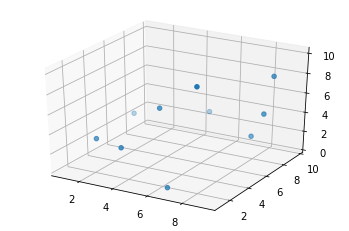

In [2]:
#Example of using the show3d function
from numpy.random import random

a = random( 30 ) * 10
show3d( a )

### Question 1 _[10-15 lines of text]_

Write a function that finds the total potential between a set of atoms. Describe your solution, pay attention to the time it takes to run your evaluation functions as this will matter later. Demonstrate your solution by making a plot of the potential between two Ar atoms, one placed at (0, 0, 0) the other in the range (0, 0, [1.65-10.0]).

For the 12-6 Lennard-Jones Potential between two atoms, we can simply define our constants and do a straightforward calculation. In this case our problem is one-dimensional, and we just create a linearly spaced set of points between 1.65 and 10 using np.linspace, calculate the potential at each value in the set of points, and plot the result.

For clarity I mask the result to have the points with V>0 appear blue and the points with V<0 appear orange. Further I plot a second set of axes with the potential between 3 and 5, which is the "interesting" area, with both a root and a minimum.

Lastly we use the timeit module to measure the time it takes to calculate the total potential for the Argon cloud.

Avg calculation time of total potential: 1.4702e-04 s


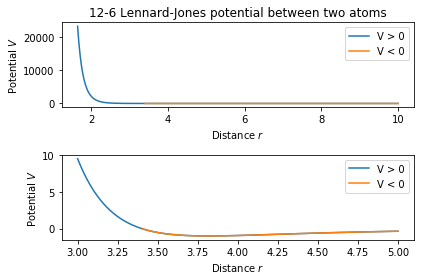

In [2]:
# Star-imports are not really pythonic, but they are handy in this case!
from p3 import *
fig, ax, ax2 = q1()
plt.show()

### Question 2 _[10-15 lines of tex]_

Write a root-finding function, use an algorithm of your choice. Demonstrate the correctness by finding the distance between two Ar atoms where the potential is zero. Briefly explain your choice of algorithm, your implementation of a solution and your results.

The analytical solution to this problem is given by

$r = \frac{A^{1/6}}{B^{1/6}} = \sigma$

For this question I have chosen to implement four different root-finding algorithms:
 - Bisection
 - Newton-Raphson (with a central difference approximation to the derivative)
 - Secant
 - Inverse quadratic

For each of these algorithms I measure the time it takes to find the root given some starting condition:

In [3]:
q2()

Roots of 12-6 Lennard-Jones potential found:

Bisection Method:
Root: 3.401
Avg time: 4.253e-05

Newton-Raphson Method with numerical derivative:
Root: 3.401
Avg time: 3.499e-05

Secant Method:
Root: 3.401
Avg time: 2.147e-05

Inverse Quadratic Method:
Root: 3.401
Avg time: 2.102e-05


For each of them we see that it indeed finds the root correctly, and all algorithms solve the problem in roughly the same time - with inverse quadratic method beating bisetion by just a factor of two.

For this problem, of course, we are dealing with a simple root, which all of the algorithms are adept at handling. Had we encountered a multiple root, the bisection algorithm is thrown out the window (unless, of course, it is a saddle point), and one would probably have to use the inverse fractional method.

### Question 3 _[10-15 lines of text]_

Write a conjugate gradient solver to find minimum of a multidimensional function. Demonstrate your solution by finding the minimal potential of the provided dataset, Ar-lines. Include timing in your runs, and compare your results and performance to that of the conjugate gradient method that is provided in scipy (or matlab if you go with matlab) and print your results in the form: 

Minimum potential [V] found in [S] seconds. 

Describe the core elements of your implementation.

### Question 4 _[10-15 lines of text]_

Write a heuristics based method to find the minimum of a multidimensional function. Choose from one of the following heuristics:
- Firefly
- Basinhopping
- Genetic algorithm

Repeat the experiments from question 3, with the simulated annealing method. Compare the speed and precision of the simulated annealing function to that of the conjugate gradient. Motivate your choice of heuristic.
